In [1]:
# import your xesmf package

import numpy as np
import xarray as xr
import xesmf as xe
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
#import os

In [2]:
# keep attributes for all datasets
xr.set_options(keep_attrs=True)

In [3]:
# file path for climate datasets
# GPM IMERGE precipitation dataset file path 
fn = '/mnt/project/input/gpm/gpm_africa_daily_transposed_20000930_20210930.nc'

# GFDL-ESM4 precipitation dataset file path
fn1 = '/mnt/project/input/gcm/pr_day_GFDL-ESM4_ssp585_r1i1p1f1_gr1_20150101-21001231.nc'

# MRI-ESM2-0 precipitation dataset file path
fn2 = '/mnt/project/input/gcm/pr_day_MRI-ESM2-0_ssp245_r1i1p1f1_gn_20150101-21001231.nc'

In [4]:
# Load the GPM IMERGE 2000 to 2021 precipitation dataset
ds = xr.open_dataset('/mnt/project/input/gpm/gpm_africa_daily_transposed_20000930_20210930.nc')
ds

<xarray.Dataset>
Dimensions:  (lat: 281, lon: 361, time: 7792)
Coordinates:
  * lat      (lat) float32 1.95 2.05 2.15 2.25 2.35 ... 29.65 29.75 29.85 29.95
  * lon      (lon) float32 -18.05 -17.95 -17.85 -17.75 ... 17.75 17.85 17.95
  * time     (time) datetime64[ns] 2000-06-01 2000-06-02 ... 2021-09-30
Data variables:
    pr       (lat, lon, time) float32 ...

In [5]:
# Load the GFDL ESM4 2015 to 2100 precipitation dataset
ds_gfdl = xr.open_dataset(fn1)
ds_gfdl

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 30, time: 31390, lon: 30)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
  * lat        (lat) float64 1.5 2.5 3.5 4.5 5.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon        (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time       (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
Data variables:
    lat_bnds   (time, lat, bnds) float64 ...
    lon_bnds   (time, lon, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
    time_bnds  (time, bnds) object ...
Attributes: (12/46)
    external_variables:     areacella
    history:                File was processed by fremetar (GFDL analog of CM...
    table_id:               day
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60225.0
    ...                     ...
    title:                  NOAA GFDL GFDL-ESM4 model output prepared for CMI...
    tracking_id:            hdl:21.14100/e5a52b09-5ca8-421d-a446-f0874c07f4c6
    variable_id:            pr
    variant_info:           N/A
    references:             see further_info_url attribute
    variant_label:          r1i1p1f1

In [6]:
# Load the MRI ESM2-0 2015 to 2100 precipitation dataset
ds_mri = xr.open_dataset(fn2)
ds_mri

<xarray.Dataset>
Dimensions:    (time: 31411, bnds: 2, lat: 27, lon: 33)
Coordinates:
  * time       (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
  * lat        (lat) float64 1.682 2.804 3.925 5.047 ... 27.48 28.6 29.72 30.84
  * lon        (lon) float64 -18.0 -16.88 -15.75 -14.62 ... 15.75 16.88 18.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (time, lat, bnds) float64 ...
    lon_bnds   (time, lon, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
Attributes: (12/44)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60265.0
    branch_time_in_parent:  60265.0
    creation_date:          2019-05-23T16:08:19Z
    ...                     ...
    title:                  MRI-ESM2-0 output prepared for CMIP6
    variable_id:            pr
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MRI is licensed unde...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/299e9b1f-adc0-4cf9-a88b-5a2b5ea12df9

In [7]:
# transpose IMERGE precipitation to the right format
ds = ds.transpose('time','lat','lon')
ds

<xarray.Dataset>
Dimensions:  (lat: 281, lon: 361, time: 7792)
Coordinates:
  * lat      (lat) float32 1.95 2.05 2.15 2.25 2.35 ... 29.65 29.75 29.85 29.95
  * lon      (lon) float32 -18.05 -17.95 -17.85 -17.75 ... 17.75 17.85 17.95
  * time     (time) datetime64[ns] 2000-06-01 2000-06-02 ... 2021-09-30
Data variables:
    pr       (time, lat, lon) float32 ...

In [8]:
# re-assign Dimension name attribute
ds['pr'] = ds.pr.assign_attrs(DimensionNames='time,lat,lon')
ds

<xarray.Dataset>
Dimensions:  (lat: 281, lon: 361, time: 7792)
Coordinates:
  * lat      (lat) float32 1.95 2.05 2.15 2.25 2.35 ... 29.65 29.75 29.85 29.95
  * lon      (lon) float32 -18.05 -17.95 -17.85 -17.75 ... 17.75 17.85 17.95
  * time     (time) datetime64[ns] 2000-06-01 2000-06-02 ... 2021-09-30
Data variables:
    pr       (time, lat, lon) float32 ...

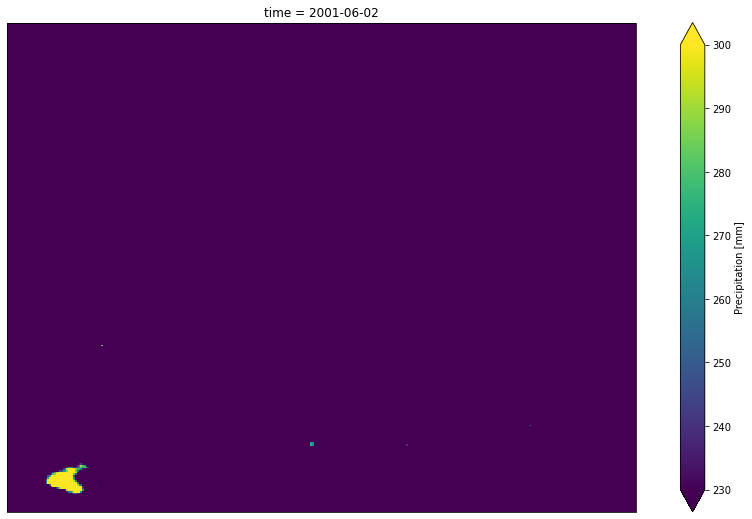

In [9]:
plt.figure(figsize=(16, 9))
ax = plt.axes(projection=ccrs.UTM(zone=32))
ds['pr'].isel(time=366).plot.pcolormesh(ax=ax, vmin=230, vmax=300);
ax.coastlines()

In [10]:
# view lat and lon values
ds['lat'].values, ds['lon'].values

(array([ 1.95,  2.05,  2.15,  2.25,  2.35,  2.45,  2.55,  2.65,  2.75,
         2.85,  2.95,  3.05,  3.15,  3.25,  3.35,  3.45,  3.55,  3.65,
         3.75,  3.85,  3.95,  4.05,  4.15,  4.25,  4.35,  4.45,  4.55,
         4.65,  4.75,  4.85,  4.95,  5.05,  5.15,  5.25,  5.35,  5.45,
         5.55,  5.65,  5.75,  5.85,  5.95,  6.05,  6.15,  6.25,  6.35,
         6.45,  6.55,  6.65,  6.75,  6.85,  6.95,  7.05,  7.15,  7.25,
         7.35,  7.45,  7.55,  7.65,  7.75,  7.85,  7.95,  8.05,  8.15,
         8.25,  8.35,  8.45,  8.55,  8.65,  8.75,  8.85,  8.95,  9.05,
         9.15,  9.25,  9.35,  9.45,  9.55,  9.65,  9.75,  9.85,  9.95,
        10.05, 10.15, 10.25, 10.35, 10.45, 10.55, 10.65, 10.75, 10.85,
        10.95, 11.05, 11.15, 11.25, 11.35, 11.45, 11.55, 11.65, 11.75,
        11.85, 11.95, 12.05, 12.15, 12.25, 12.35, 12.45, 12.55, 12.65,
        12.75, 12.85, 12.95, 13.05, 13.15, 13.25, 13.35, 13.45, 13.55,
        13.65, 13.75, 13.85, 13.95, 14.05, 14.15, 14.25, 14.35, 14.45,
      

In [11]:
# lets create the output grid for IMERGE to coarse GFDL-ESM

gfdl_grid = {'lat': ds_gfdl['lat'].values,
                     'lon': ds_gfdl['lon'].values,
                    }
gfdl_grid

{'lat': array([ 1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5, 11.5,
        12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5,
        23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5]),
 'lon': array([-18.125, -16.875, -15.625, -14.375, -13.125, -11.875, -10.625,
         -9.375,  -8.125,  -6.875,  -5.625,  -4.375,  -3.125,  -1.875,
         -0.625,   0.625,   1.875,   3.125,   4.375,   5.625,   6.875,
          8.125,   9.375,  10.625,  11.875,  13.125,  14.375,  15.625,
         16.875,  18.125])}

In [12]:
# lets try the simplest bilinear scheme first

regridder_bilinear_gfdl = xe.Regridder(ds, gfdl_grid, method='bilinear')
regridder_bilinear_gfdl  # print basic regridder information.

Overwrite existing file: bilinear_281x361_30x30.nc 
 You can set reuse_weights=True to save computing time.


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_281x361_30x30.nc 
Reuse pre-computed weights? False 
Input grid shape:           (281, 361) 
Output grid shape:          (30, 30) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      False

In [13]:
# Apply the bilinear "regridder" to our GPM IMERGE dataarray:
ds_imerge_bilinear_gfdl = regridder_bilinear_gfdl(ds)
ds_imerge_bilinear_gfdl

using dimensions ('lat', 'lon') from data variable pr as the horizontal dimensions for this dataset.


/home/jefire/miniconda3/envs/xesmf_env/lib/python3.9/site-packages/xesmf/frontend.py:477: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


<xarray.Dataset>
Dimensions:  (time: 7792, lat: 30, lon: 30)
Coordinates:
  * time     (time) datetime64[ns] 2000-06-01 2000-06-02 ... 2021-09-30
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    pr       (time, lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    regrid_method:  bilinear

In [14]:
# method 2
# Nearest neighbour methods "source to destination (s2d)""
# also called 'nearest_s2d'

regridder_nearest_s2d_gfdl = xe.Regridder(ds, gfdl_grid, method='nearest_s2d')
regridder_nearest_s2d_gfdl  # print basic regridder information.

Overwrite existing file: nearest_s2d_281x361_30x30.nc 
 You can set reuse_weights=True to save computing time.


xESMF Regridder 
Regridding algorithm:       nearest_s2d 
Weight filename:            nearest_s2d_281x361_30x30.nc 
Reuse pre-computed weights? False 
Input grid shape:           (281, 361) 
Output grid shape:          (30, 30) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      False

In [15]:
# Apply the nearest_s2d "regridder" to our GPM IMERGE dataarray:
ds_imerge_nearest_s2d_gfdl = regridder_nearest_s2d_gfdl(ds)
ds_imerge_nearest_s2d_gfdl

using dimensions ('lat', 'lon') from data variable pr as the horizontal dimensions for this dataset.


/home/jefire/miniconda3/envs/xesmf_env/lib/python3.9/site-packages/xesmf/frontend.py:477: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


<xarray.Dataset>
Dimensions:  (time: 7792, lat: 30, lon: 30)
Coordinates:
  * time     (time) datetime64[ns] 2000-06-01 2000-06-02 ... 2021-09-30
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    pr       (time, lat, lon) float64 0.3652 0.0 1.513 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    regrid_method:  nearest_s2d

In [16]:
# method 3
# Nearest neighbour methods "destination to source (d2s)""
# also called 'nearest_s2d'

regridder_nearest_d2s_gfdl = xe.Regridder(ds, gfdl_grid, method='nearest_d2s')
regridder_nearest_d2s_gfdl  # print basic regridder information.

Overwrite existing file: nearest_d2s_281x361_30x30.nc 
 You can set reuse_weights=True to save computing time.


xESMF Regridder 
Regridding algorithm:       nearest_d2s 
Weight filename:            nearest_d2s_281x361_30x30.nc 
Reuse pre-computed weights? False 
Input grid shape:           (281, 361) 
Output grid shape:          (30, 30) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      False

In [17]:
# Apply the nearest_d2s "regridder" to our GPM IMERGE dataset:

ds_imerge_nearest_d2s_gfdl = regridder_nearest_d2s_gfdl(ds)
ds_imerge_nearest_d2s_gfdl

using dimensions ('lat', 'lon') from data variable pr as the horizontal dimensions for this dataset.


/home/jefire/miniconda3/envs/xesmf_env/lib/python3.9/site-packages/xesmf/frontend.py:477: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


<xarray.Dataset>
Dimensions:  (time: 7792, lat: 30, lon: 30)
Coordinates:
  * time     (time) datetime64[ns] 2000-06-01 2000-06-02 ... 2021-09-30
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    pr       (time, lat, lon) float64 9.212 1.961 33.73 0.07558 ... 0.0 0.0 0.0
Attributes:
    regrid_method:  nearest_d2s

In [18]:
# GPM IMERGE grid with bounds

lat_boundary = np.hstack([ds.coords['lat'].data - 0.05, ds.coords['lat'][-1].data + 0.05])
lon_boundary = np.hstack([ds.coords['lon'].data - 0.05, ds.coords['lon'][-1].data + 0.05])

imerge_grid_with_bounds = ds
imerge_grid_with_bounds.coords['lat_b'] = xr.DataArray(lat_boundary, dims=['lat_b'])
imerge_grid_with_bounds.coords['lon_b'] = xr.DataArray(lon_boundary, dims=['lon_b'])
imerge_grid_with_bounds

<xarray.Dataset>
Dimensions:  (lat: 281, lon: 361, time: 7792, lat_b: 282, lon_b: 362)
Coordinates:
  * lat      (lat) float32 1.95 2.05 2.15 2.25 2.35 ... 29.65 29.75 29.85 29.95
  * lon      (lon) float32 -18.05 -17.95 -17.85 -17.75 ... 17.75 17.85 17.95
  * time     (time) datetime64[ns] 2000-06-01 2000-06-02 ... 2021-09-30
  * lat_b    (lat_b) float64 1.9 2.0 2.1 2.2 2.3 ... 29.6 29.7 29.8 29.9 30.0
  * lon_b    (lon_b) float64 -18.1 -18.0 -17.9 -17.8 ... 17.7 17.8 17.9 18.0
Data variables:
    pr       (time, lat, lon) float32 ...

In [19]:
# GFDL grid with bounds
lat_boundary_gfdl = np.hstack([ds_gfdl.coords['lat'].data - 0.5, ds_gfdl.coords['lat'][-1].data + 0.5])
lon_boundary_gfdl = np.hstack([ds_gfdl.coords['lon'].data - 0.625, ds_gfdl.coords['lon'][-1].data + 0.625])

gfdl_grid_with_bounds = ds_gfdl
gfdl_grid_with_bounds.coords['lat_b'] = xr.DataArray(lat_boundary_gfdl, dims=['lat_b'])
gfdl_grid_with_bounds.coords['lon_b'] = xr.DataArray(lon_boundary_gfdl, dims=['lon_b'])
gfdl_grid_with_bounds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 30, time: 31390, lon: 30, lat_b: 31, lon_b: 31)
Coordinates:
  * bnds       (bnds) float64 1.0 2.0
  * lat        (lat) float64 1.5 2.5 3.5 4.5 5.5 ... 26.5 27.5 28.5 29.5 30.5
  * lon        (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * time       (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
  * lat_b      (lat_b) float64 1.0 2.0 3.0 4.0 5.0 ... 27.0 28.0 29.0 30.0 31.0
  * lon_b      (lon_b) float64 -18.75 -17.5 -16.25 -15.0 ... 16.25 17.5 18.75
Data variables:
    lat_bnds   (time, lat, bnds) float64 ...
    lon_bnds   (time, lon, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
    time_bnds  (time, bnds) object 2015-01-01 00:00:00 ... 2101-01-01 00:00:00
Attributes: (12/46)
    external_variables:     areacella
    history:                File was processed by fremetar (GFDL analog of CM...
    table_id:               day
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60225.0
    ...                     ...
    title:                  NOAA GFDL GFDL-ESM4 model output prepared for CMI...
    tracking_id:            hdl:21.14100/e5a52b09-5ca8-421d-a446-f0874c07f4c6
    variable_id:            pr
    variant_info:           N/A
    references:             see further_info_url attribute
    variant_label:          r1i1p1f1

In [20]:
# lets apply the Conservative Regridding
# first Make a new regridder with conservative option and apply it to our data.

regridder_conserve_gfdl = xe.Regridder(imerge_grid_with_bounds, gfdl_grid_with_bounds, method='conservative')
regridder_conserve_gfdl  # print basic regridder information.

Overwrite existing file: conservative_281x361_30x30.nc 
 You can set reuse_weights=True to save computing time.


xESMF Regridder 
Regridding algorithm:       conservative 
Weight filename:            conservative_281x361_30x30.nc 
Reuse pre-computed weights? False 
Input grid shape:           (281, 361) 
Output grid shape:          (30, 30) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      False

In [21]:
# apply GFDL conservative regridding to imerge dataset
ds_imerge_conserve_gfdl = regridder_conserve_gfdl(ds)
ds_imerge_conserve_gfdl

using dimensions ('lat', 'lon') from data variable pr as the horizontal dimensions for this dataset.


/home/jefire/miniconda3/envs/xesmf_env/lib/python3.9/site-packages/xesmf/frontend.py:477: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


<xarray.Dataset>
Dimensions:  (time: 7792, lat: 30, lon: 30, lat_b: 282, lon_b: 362)
Coordinates:
  * time     (time) datetime64[ns] 2000-06-01 2000-06-02 ... 2021-09-30
  * lat_b    (lat_b) float64 1.9 2.0 2.1 2.2 2.3 ... 29.6 29.7 29.8 29.9 30.0
  * lon_b    (lon_b) float64 -18.1 -18.0 -17.9 -17.8 ... 17.7 17.8 17.9 18.0
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    pr       (time, lat, lon) float64 0.0737 0.01565 0.2699 ... 3.1e-10 0.0
Attributes:
    regrid_method:  conservative

In [22]:
# first Make a new regridder with Patch option and apply it to our data.

regridder_patch_gfdl = xe.Regridder(ds, gfdl_grid, method='patch')
regridder_patch_gfdl  # print basic regridder information.

Overwrite existing file: patch_281x361_30x30.nc 
 You can set reuse_weights=True to save computing time.


xESMF Regridder 
Regridding algorithm:       patch 
Weight filename:            patch_281x361_30x30.nc 
Reuse pre-computed weights? False 
Input grid shape:           (281, 361) 
Output grid shape:          (30, 30) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      False

In [23]:
# Apply this "regridder" our GPM IMERGE dataset:
ds_imerge_patch_gfdl = regridder_patch_gfdl(ds)
ds_imerge_patch_gfdl

using dimensions ('lat', 'lon') from data variable pr as the horizontal dimensions for this dataset.


/home/jefire/miniconda3/envs/xesmf_env/lib/python3.9/site-packages/xesmf/frontend.py:477: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


<xarray.Dataset>
Dimensions:  (time: 7792, lat: 30, lon: 30, lat_b: 282, lon_b: 362)
Coordinates:
  * time     (time) datetime64[ns] 2000-06-01 2000-06-02 ... 2021-09-30
  * lat_b    (lat_b) float64 1.9 2.0 2.1 2.2 2.3 ... 29.6 29.7 29.8 29.9 30.0
  * lon_b    (lon_b) float64 -18.1 -18.0 -17.9 -17.8 ... 17.7 17.8 17.9 18.0
  * lon      (lon) float64 -18.12 -16.88 -15.62 -14.38 ... 15.62 16.88 18.12
  * lat      (lat) float64 1.5 2.5 3.5 4.5 5.5 6.5 ... 26.5 27.5 28.5 29.5 30.5
Data variables:
    pr       (time, lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    regrid_method:  patch

In [24]:
# Second GCM regridding
#  regridding IMERGE to MRI-ESM2-0 grid

mri_grid = {'lat': ds_mri['lat'].values,
                     'lon': ds_mri['lon'].values,
                    }
mri_grid

{'lat': array([ 1.68223,  2.80372,  3.92521,  5.0467 ,  6.16819,  7.28968,
         8.41117,  9.53266, 10.65415, 11.77564, 12.89713, 14.01862,
        15.14011, 16.2616 , 17.38309, 18.50458, 19.62607, 20.74756,
        21.86905, 22.99054, 24.11203, 25.23351, 26.355  , 27.47649,
        28.59798, 29.71947, 30.84096]),
 'lon': array([-18.   , -16.875, -15.75 , -14.625, -13.5  , -12.375, -11.25 ,
        -10.125,  -9.   ,  -7.875,  -6.75 ,  -5.625,  -4.5  ,  -3.375,
         -2.25 ,  -1.125,   0.   ,   1.125,   2.25 ,   3.375,   4.5  ,
          5.625,   6.75 ,   7.875,   9.   ,  10.125,  11.25 ,  12.375,
         13.5  ,  14.625,  15.75 ,  16.875,  18.   ])}

In [25]:
# lets try the simplest bilinear scheme first

regridder_bilinear_mri = xe.Regridder(ds, mri_grid, method='bilinear')
regridder_bilinear_mri  # print basic regridder information.

Create weight file: bilinear_281x361_27x33.nc


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_281x361_27x33.nc 
Reuse pre-computed weights? False 
Input grid shape:           (281, 361) 
Output grid shape:          (27, 33) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      False

In [26]:
# Apply the bilinear "regridder" to our GPM IMERGE dataset:
ds_imerge_bilinear_mri = regridder_bilinear_mri(ds)
ds_imerge_bilinear_mri

using dimensions ('lat', 'lon') from data variable pr as the horizontal dimensions for this dataset.


/home/jefire/miniconda3/envs/xesmf_env/lib/python3.9/site-packages/xesmf/frontend.py:477: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


<xarray.Dataset>
Dimensions:  (time: 7792, lat: 27, lon: 33, lat_b: 282, lon_b: 362)
Coordinates:
  * time     (time) datetime64[ns] 2000-06-01 2000-06-02 ... 2021-09-30
  * lat_b    (lat_b) float64 1.9 2.0 2.1 2.2 2.3 ... 29.6 29.7 29.8 29.9 30.0
  * lon_b    (lon_b) float64 -18.1 -18.0 -17.9 -17.8 ... 17.7 17.8 17.9 18.0
  * lon      (lon) float64 -18.0 -16.88 -15.75 -14.62 ... 14.62 15.75 16.88 18.0
  * lat      (lat) float64 1.682 2.804 3.925 5.047 ... 27.48 28.6 29.72 30.84
Data variables:
    pr       (time, lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    regrid_method:  bilinear

In [27]:
# method 2
# Nearest neighbour methods "source to destination (s2d)""
# also called 'nearest_s2d'

regridder_nearest_s2d_mri = xe.Regridder(ds, mri_grid, method='nearest_s2d')
regridder_nearest_s2d_mri  # print basic regridder information.

Create weight file: nearest_s2d_281x361_27x33.nc


xESMF Regridder 
Regridding algorithm:       nearest_s2d 
Weight filename:            nearest_s2d_281x361_27x33.nc 
Reuse pre-computed weights? False 
Input grid shape:           (281, 361) 
Output grid shape:          (27, 33) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      False

In [28]:
# Apply the nearest_s2d "regridder" to our GPM IMERGE dataarray:
ds_imerge_nearest_s2d_mri = regridder_nearest_s2d_mri(ds)
ds_imerge_nearest_s2d_mri

using dimensions ('lat', 'lon') from data variable pr as the horizontal dimensions for this dataset.


/home/jefire/miniconda3/envs/xesmf_env/lib/python3.9/site-packages/xesmf/frontend.py:477: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


<xarray.Dataset>
Dimensions:  (time: 7792, lat: 27, lon: 33, lat_b: 282, lon_b: 362)
Coordinates:
  * time     (time) datetime64[ns] 2000-06-01 2000-06-02 ... 2021-09-30
  * lat_b    (lat_b) float64 1.9 2.0 2.1 2.2 2.3 ... 29.6 29.7 29.8 29.9 30.0
  * lon_b    (lon_b) float64 -18.1 -18.0 -17.9 -17.8 ... 17.7 17.8 17.9 18.0
  * lon      (lon) float64 -18.0 -16.88 -15.75 -14.62 ... 14.62 15.75 16.88 18.0
  * lat      (lat) float64 1.682 2.804 3.925 5.047 ... 27.48 28.6 29.72 30.84
Data variables:
    pr       (time, lat, lon) float64 0.7146 0.0 0.6132 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    regrid_method:  nearest_s2d

In [29]:
# method 3
# Nearest neighbour methods "destination to source (d2s)""
# also called 'nearest_s2d'

regridder_nearest_d2s_mri = xe.Regridder(ds, mri_grid, method='nearest_d2s')
regridder_nearest_d2s_mri # print basic regridder information.

Create weight file: nearest_d2s_281x361_27x33.nc


xESMF Regridder 
Regridding algorithm:       nearest_d2s 
Weight filename:            nearest_d2s_281x361_27x33.nc 
Reuse pre-computed weights? False 
Input grid shape:           (281, 361) 
Output grid shape:          (27, 33) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      False

In [30]:
# Apply the nearest_d2s "regridder" to our GPM IMERGE dataarray:

ds_imerge_nearest_d2s_mri = regridder_nearest_d2s_mri(ds)
ds_imerge_nearest_d2s_mri

using dimensions ('lat', 'lon') from data variable pr as the horizontal dimensions for this dataset.


/home/jefire/miniconda3/envs/xesmf_env/lib/python3.9/site-packages/xesmf/frontend.py:477: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


<xarray.Dataset>
Dimensions:  (time: 7792, lat: 27, lon: 33, lat_b: 282, lon_b: 362)
Coordinates:
  * time     (time) datetime64[ns] 2000-06-01 2000-06-02 ... 2021-09-30
  * lat_b    (lat_b) float64 1.9 2.0 2.1 2.2 2.3 ... 29.6 29.7 29.8 29.9 30.0
  * lon_b    (lon_b) float64 -18.1 -18.0 -17.9 -17.8 ... 17.7 17.8 17.9 18.0
  * lon      (lon) float64 -18.0 -16.88 -15.75 -14.62 ... 14.62 15.75 16.88 18.0
  * lat      (lat) float64 1.682 2.804 3.925 5.047 ... 27.48 28.6 29.72 30.84
Data variables:
    pr       (time, lat, lon) float64 27.22 3.234 45.81 7.974 ... 0.0 0.0 0.0
Attributes:
    regrid_method:  nearest_d2s

In [32]:
# lets create input and output grid bounds for IMERGE to MRI-ESM2-0
# lets create the output grid with bounds for conservative regridding

# MRI-ESM2-0 grid with bounds
lat_boundary_mri = np.hstack([ds_mri.coords['lat'].data - 0.560745, ds_mri.coords['lat'][-1].data + 0.560745])
lon_boundary_mri = np.hstack([ds_mri.coords['lon'].data - 0.5625, ds_mri.coords['lon'][-1].data + 0.5625])

mri_grid_with_bounds = ds_mri
mri_grid_with_bounds.coords['lat_b'] = xr.DataArray(lat_boundary_mri, dims=['lat_b'])
mri_grid_with_bounds.coords['lon_b'] = xr.DataArray(lon_boundary_mri, dims=['lon_b'])
mri_grid_with_bounds

<xarray.Dataset>
Dimensions:    (time: 31411, bnds: 2, lat: 27, lon: 33, lat_b: 28, lon_b: 34)
Coordinates:
  * time       (time) datetime64[ns] 2015-01-01T12:00:00 ... 2100-12-31T12:00:00
  * lat        (lat) float64 1.682 2.804 3.925 5.047 ... 27.48 28.6 29.72 30.84
  * lon        (lon) float64 -18.0 -16.88 -15.75 -14.62 ... 15.75 16.88 18.0
  * lat_b      (lat_b) float64 1.121 2.243 3.364 4.486 ... 29.16 30.28 31.4
  * lon_b      (lon_b) float64 -18.56 -17.44 -16.31 -15.19 ... 16.31 17.44 18.56
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 2015-01-01 2015-01-02 ... 2101-01-01
    lat_bnds   (time, lat, bnds) float64 ...
    lon_bnds   (time, lon, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
Attributes: (12/44)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60265.0
    branch_time_in_parent:  60265.0
    creation_date:          2019-05-23T16:08:19Z
    ...                     ...
    title:                  MRI-ESM2-0 output prepared for CMIP6
    variable_id:            pr
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MRI is licensed unde...
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/299e9b1f-adc0-4cf9-a88b-5a2b5ea12df9

In [34]:
# first Make a new regridder with conservative option and apply it to our data.

regridder_conserve_mri = xe.Regridder(imerge_grid_with_bounds, mri_grid_with_bounds, method='conservative')
regridder_conserve_mri  # print basic regridder information.

Overwrite existing file: conservative_281x361_27x33.nc 
 You can set reuse_weights=True to save computing time.


xESMF Regridder 
Regridding algorithm:       conservative 
Weight filename:            conservative_281x361_27x33.nc 
Reuse pre-computed weights? False 
Input grid shape:           (281, 361) 
Output grid shape:          (27, 33) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      False

In [35]:
# apply MRI-ESM2-0 conservative regridding to imerge dataarray
ds_imerge_conserve_mri = regridder_conserve_mri(ds)
ds_imerge_conserve_mri

using dimensions ('lat', 'lon') from data variable pr as the horizontal dimensions for this dataset.


/home/jefire/miniconda3/envs/xesmf_env/lib/python3.9/site-packages/xesmf/frontend.py:477: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


<xarray.Dataset>
Dimensions:  (time: 7792, lat: 27, lon: 33, lat_b: 282, lon_b: 362)
Coordinates:
  * time     (time) datetime64[ns] 2000-06-01 2000-06-02 ... 2021-09-30
  * lat_b    (lat_b) float64 1.9 2.0 2.1 2.2 2.3 ... 29.6 29.7 29.8 29.9 30.0
  * lon_b    (lon_b) float64 -18.1 -18.0 -17.9 -17.8 ... 17.7 17.8 17.9 18.0
  * lon      (lon) float64 -18.0 -16.88 -15.75 -14.62 ... 14.62 15.75 16.88 18.0
  * lat      (lat) float64 1.682 2.804 3.925 5.047 ... 27.48 28.6 29.72 30.84
Data variables:
    pr       (time, lat, lon) float64 0.2412 0.04797 0.3861 ... 0.0 0.0 0.0
Attributes:
    regrid_method:  conservative

In [36]:
# apply Patch regridding to the dataset
# first Make a new regridder with Patch option and apply it to our data.

regridder_patch_mri = xe.Regridder(ds, mri_grid, method='patch')
regridder_patch_mri  # print basic regridder information.

Create weight file: patch_281x361_27x33.nc


xESMF Regridder 
Regridding algorithm:       patch 
Weight filename:            patch_281x361_27x33.nc 
Reuse pre-computed weights? False 
Input grid shape:           (281, 361) 
Output grid shape:          (27, 33) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      False

In [37]:
# first Make a new regridder with Patch option and apply it to our data.

regridder_patch_mri = xe.Regridder(ds, mri_grid, method='patch')
regridder_patch_mri  # print basic regridder information.

Overwrite existing file: patch_281x361_27x33.nc 
 You can set reuse_weights=True to save computing time.


xESMF Regridder 
Regridding algorithm:       patch 
Weight filename:            patch_281x361_27x33.nc 
Reuse pre-computed weights? False 
Input grid shape:           (281, 361) 
Output grid shape:          (27, 33) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      False

In [38]:
# Apply this "regridder" our GPM IMERGE dataarray:
ds_imerge_patch_mri = regridder_patch_mri(ds)
ds_imerge_patch_mri

using dimensions ('lat', 'lon') from data variable pr as the horizontal dimensions for this dataset.


/home/jefire/miniconda3/envs/xesmf_env/lib/python3.9/site-packages/xesmf/frontend.py:477: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  ds_out = xr.apply_ufunc(


<xarray.Dataset>
Dimensions:  (time: 7792, lat: 27, lon: 33, lat_b: 282, lon_b: 362)
Coordinates:
  * time     (time) datetime64[ns] 2000-06-01 2000-06-02 ... 2021-09-30
  * lat_b    (lat_b) float64 1.9 2.0 2.1 2.2 2.3 ... 29.6 29.7 29.8 29.9 30.0
  * lon_b    (lon_b) float64 -18.1 -18.0 -17.9 -17.8 ... 17.7 17.8 17.9 18.0
  * lon      (lon) float64 -18.0 -16.88 -15.75 -14.62 ... 14.62 15.75 16.88 18.0
  * lat      (lat) float64 1.682 2.804 3.925 5.047 ... 27.48 28.6 29.72 30.84
Data variables:
    pr       (time, lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    regrid_method:  patch

In [47]:
# save results to netCDF file
# save the imerge GFDL dataset
ds_imerge_bilinear_gfdl.to_netcdf('/mnt/project/output/imerge_regrid/imerge_to_gfdl_bilinear.nc')

In [48]:
ds_imerge_nearest_s2d_gfdl.to_netcdf('/mnt/project/output/imerge_regrid/imerge_to_gfdl_nearest_s2d.nc')

In [49]:
ds_imerge_nearest_d2s_gfdl.to_netcdf('/mnt/project/output/imerge_regrid/imerge_to_gfdl_nearest_d2s.nc')

In [50]:
ds_imerge_conserve_gfdl.to_netcdf('/mnt/project/output/imerge_regrid/imerge_to_gfdl_conservative.nc')

In [51]:
ds_imerge_patch_gfdl.to_netcdf('/mnt/project/output/imerge_regrid/imerge_to_gfdl_patch.nc')

In [52]:
# save results to netCDF file
# save the imerge mri dataset
ds_imerge_bilinear_mri.to_netcdf('/mnt/project/output/imerge_regrid/imerge_to_mri_bilinear.nc')

In [53]:
ds_imerge_nearest_s2d_mri.to_netcdf('/mnt/project/output/imerge_regrid/imerge_to_mri_nearest_s2d.nc')

In [54]:
ds_imerge_nearest_d2s_mri.to_netcdf('/mnt/project/output/imerge_regrid/imerge_to_mri_nearest_d2s.nc')

In [55]:
ds_imerge_conserve_mri.to_netcdf('/mnt/project/output/imerge_regrid/imerge_to_mri_conservative.nc')

In [56]:
ds_imerge_patch_mri.to_netcdf('/mnt/project/output/imerge_regrid/imerge_to_mri_patch.nc')

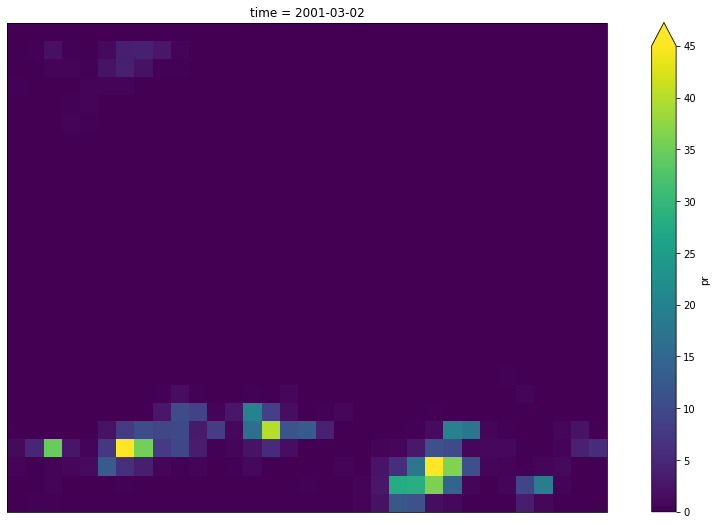

In [58]:
plt.figure(figsize=(16, 9))
ax = plt.axes(projection=ccrs.UTM(zone=32))
ds_imerge_conserve_mri['pr'].isel(time=274).plot.pcolormesh(ax=ax, vmin=0, vmax=45);
ax.coastlines()

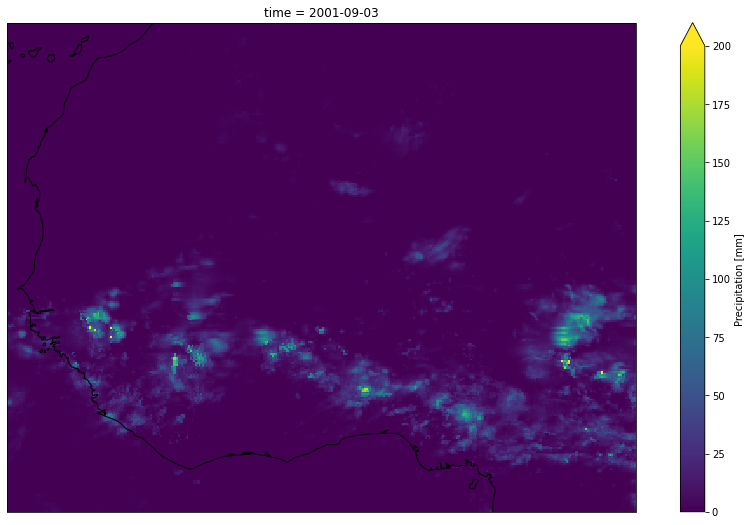

In [60]:
plt.figure(figsize=(16, 9))
ax = plt.axes(projection=ccrs.PlateCarree())
ds['pr'].isel(time=459).plot.pcolormesh(ax=ax, vmin=0, vmax=200);
ax.coastlines()

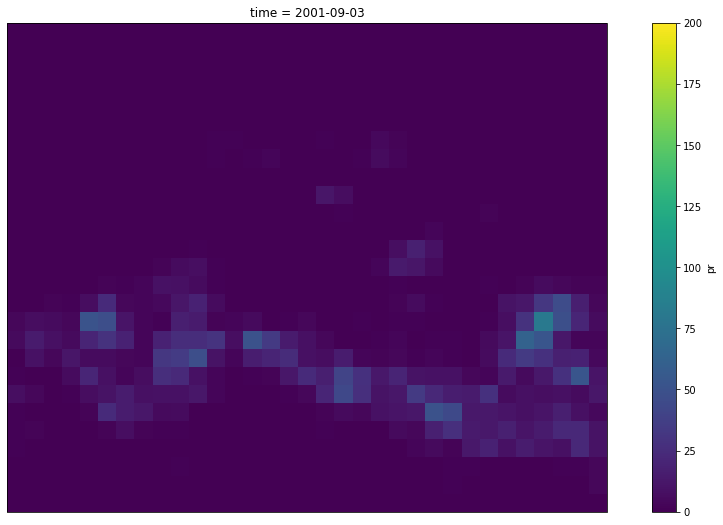

In [61]:
plt.figure(figsize=(16, 9))
ax = plt.axes(projection=ccrs.UTM(zone=32))
ds_imerge_conserve_mri['pr'].isel(time=459).plot.pcolormesh(ax=ax, vmin=0, vmax=200);
ax.coastlines()

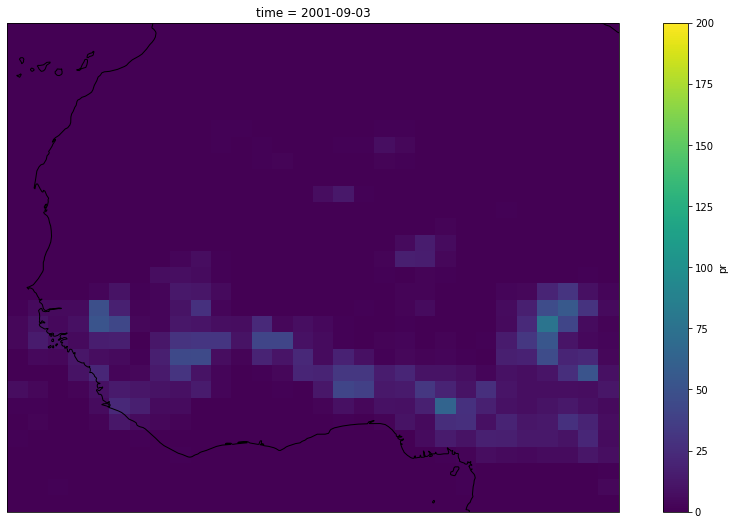

In [62]:
plt.figure(figsize=(16, 9))
ax = plt.axes(projection=ccrs.PlateCarree())
ds_imerge_conserve_gfdl['pr'].isel(time=459).plot.pcolormesh(ax=ax, vmin=0, vmax=200);
ax.coastlines()

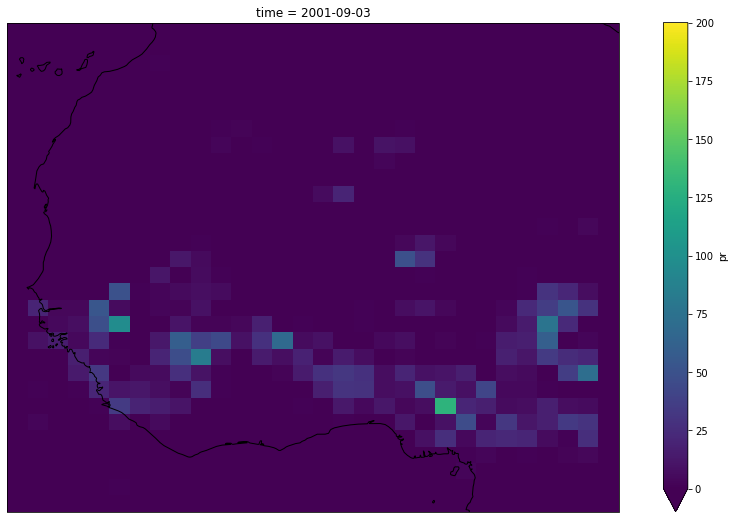

In [63]:
plt.figure(figsize=(16, 9))
ax = plt.axes(projection=ccrs.PlateCarree())
ds_imerge_patch_gfdl['pr'].isel(time=459).plot.pcolormesh(ax=ax, vmin=0, vmax=200);
ax.coastlines()

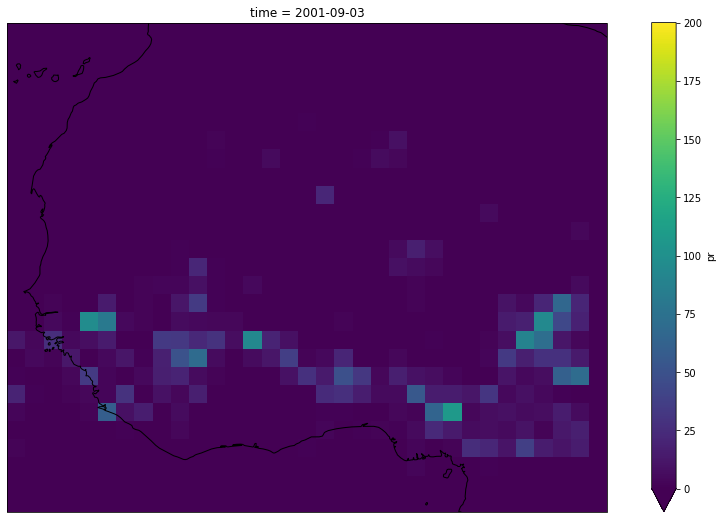

In [64]:
plt.figure(figsize=(16, 9))
ax = plt.axes(projection=ccrs.PlateCarree())
ds_imerge_patch_mri['pr'].isel(time=459).plot.pcolormesh(ax=ax, vmin=0, vmax=200);
ax.coastlines()

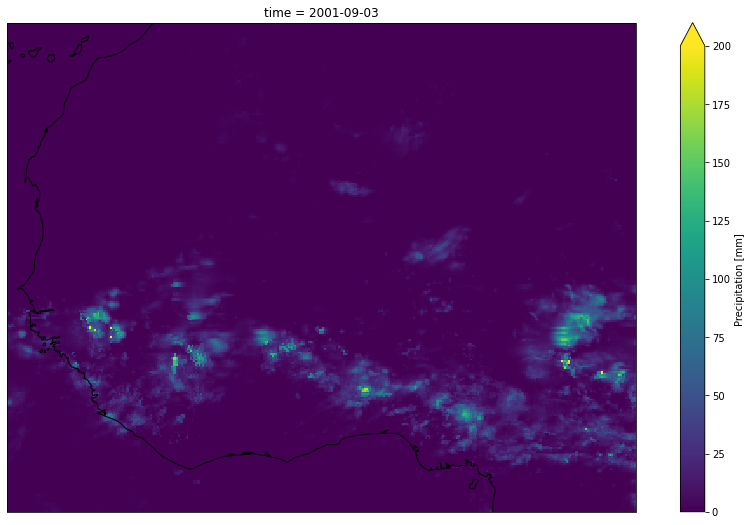

In [65]:
plt.figure(figsize=(16, 9))
ax = plt.axes(projection=ccrs.PlateCarree())
ds['pr'].isel(time=459).plot.pcolormesh(ax=ax, vmin=0, vmax=200);
ax.coastlines()